In [23]:
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt


predictions_df = pd.read_csv("predictions.csv")
predictions_df

,img_path,pred_x,pred_y,true_x,true_y,distance
0,Dataset/1755777765230.jpg,0.137045,0.267087,0.579204,0.877667,0.753865
1,Dataset/1755731931757.jpg,0.284877,0.775412,0.409799,0.076704,0.709787
2,Dataset/1755731899729.jpg,0.850418,0.281799,0.981866,0.972830,0.703423
3,Dataset/1755898135584.jpg,0.400721,0.254903,0.424462,0.944959,0.690464
4,Dataset/1755777764971.jpg,0.168926,0.376671,0.547094,0.947605,0.684820
...,...,...,...,...,...,...
5021,Dataset/1755731894355.jpg,0.223810,0.489638,0.227022,0.495497,0.006681
5022,Dataset/1755881721235.jpg,0.907586,0.617905,0.907806,0.624390,0.006488
5023,Dataset/1755777863189.jpg,0.709491,0.761067,0.711924,0.765766,0.005291
5024,Dataset/1755731873345.jpg,0.799591,0.377826,0.796715,0.378415,0.002935


In [24]:
def display_image_with_preds(idx):
    row = predictions_df.iloc[idx]
    img_path = row['img_path']
    pred_x, pred_y = row['pred_x'], row['pred_y']
    true_x, true_y = row['true_x'], row['true_y']

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Show image on the left
    img = plt.imread(img_path)
    axs[0].imshow(img)
    axs[0].set_title(f"Image: {img_path.split('/')[-1]}")
    axs[0].axis('off')

    # Show prediction and ground truth on the right
    axs[1].plot(1 - pred_x, 1 - pred_y, 'ro', label='Prediction', markersize=10)
    axs[1].plot(1 - true_x, 1 - true_y, 'go', label='Ground Truth', markersize=10)
    axs[1].set_xlim(0, 1)
    axs[1].set_ylim(0, 1)
    axs[1].set_aspect('equal', adjustable='box')
    axs[1].set_xticks([0, 1])
    axs[1].set_yticks([0, 1])
    axs[1].set_title(f"Pred (red): ({pred_x:.2f}, {pred_y:.2f})\nTrue (green): ({true_x:.2f}, {true_y:.2f})")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    return img_path

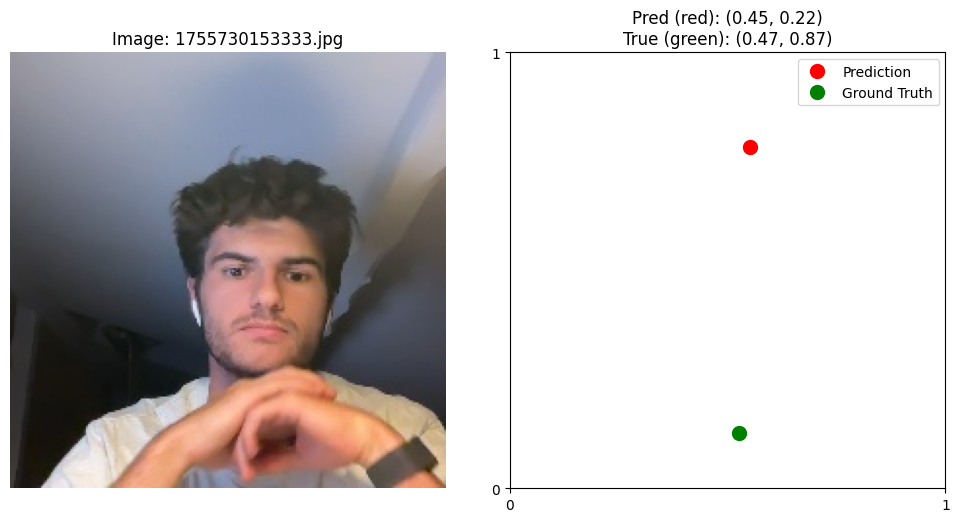

In [ ]:
images_to_delete = []

idx = 0
while True:
    img_path = display_image_with_preds(idx)

    choice = input("d (delete) / s (skip) / q (quit)")
    if choice == "d":
        images_to_delete.append(img_path)
    elif choice == "q":
        break

    idx += 1
    
    # Nettoyer l'affichage précédent
    clear_output(wait=True)

In [ ]:
print('images_to_delete', images_to_delete)

images_to_delete ['Dataset/1755731900234.jpg', 'Dataset/1755898095065.jpg', 'Dataset/1757521071045.jpg', 'Dataset/1755898115819.jpg', 'Dataset/1755731340047.jpg', 'Dataset/1755730918908.jpg', 'Dataset/1755730150252.jpg', 'Dataset/1755730509037.jpg', 'Dataset/1755730137742.jpg', 'Dataset/1757521054412.jpg', 'Dataset/1755731959458.jpg', 'Dataset/1757528223934.jpg', 'Dataset/1755730491614.jpg', 'Dataset/1755730887602.jpg', 'Dataset/1757521104041.jpg', 'Dataset/1755730866868.jpg', 'Dataset/1755731866442.jpg', 'Dataset/1757528220343.jpg']


In [ ]:
dataset_df = pd.read_csv('dataset.csv')
print('Length of dataset_df', len(dataset_df))

dataset_df[dataset_df['img_filename'].isin(images_to_delete)]
filtered_dataset_df = dataset_df[~dataset_df['img_filename'].isin(images_to_delete)]

filtered_dataset_df.to_csv('dataset_fixed.csv', index=False)
print('Length of filtered_dataset_df', len(filtered_dataset_df))


Length of dataset_df 5026
Length of filtered_dataset_df 5008
